In [1]:
import sys
import cv2
import numpy as np
import random
import pytesseract

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## 외곽선 검출 cv2.findContours
- (길벗 12장)
- contour detection
- INPUT: 0/255로 이루어진 바이너리 영상 기반으로함
- 옵션들 중 최외곽선 추출하는 RETR_external 주로많이사용

In [21]:
src= cv2.imread("contours.bmp", cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
print(type(contours))
print(len(contours))
print(contours[0].shape)
print(contours[1].shape)
#컨투어 아홉개 찾았고, 120개의 점으로 이루어져있고 가운데는 항상 1이고, 2는 x좌표 y좌표로 이루어짐 뜻함

cnt= contours[0] #120x1x2   - x1x 이기때문에 cnt[0,0,0] 가운데는 0뿐이안됨
print(cnt[0,0,:]) #0번째 컨투어 120개 가져온다음 그중에서 0번째점이고
print(cnt[1,0,:]) #첫번째점
print(cnt[0,0,0]) #0번째컨투어에서 0번째 x좌표
print(cnt[0,0,1]) #0번째컨투어에서 0번째 y좌표

<class 'list'>
9
(8, 1, 2)
(4, 1, 2)
[109 260]
[110 259]
109
260


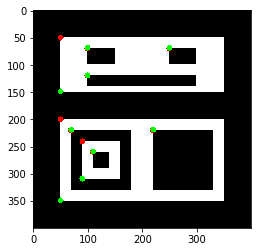

In [23]:
dst= cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    x = contours[i][0,0,0] # 점 갯수 , 1, xy축 #첫번째점
    y=  contours[i][0,0,1]
    cv2.circle(dst, (int(x), int(y)), 5, (0,0, 255), -1)
    
    x = contours[i][1,0,0] # 점 갯수 , 1, xy축 #두번째점
    y=  contours[i][1,0,1]
    cv2.circle(dst, (int(x), int(y)), 5, (0,255, 0), -1)
    
imshow("",dst)

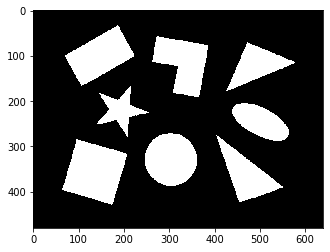

In [30]:
img= cv2.imread("polygon.bmp", 0)
_, img_bin= cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#전경이 흰색이라 INV

imshow("",img_bin)

In [31]:
contours, _= cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

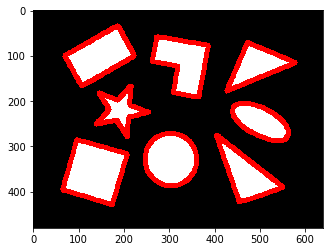

In [34]:
dst=cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, -1, (0,0,255),10)
imshow("",dst)
# -1 contour 하면 모든 컨투어 

257
233
169
1
151
199
306
163
319


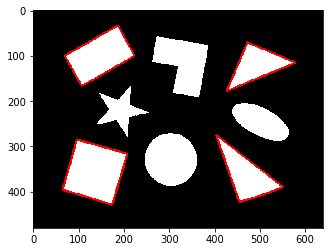

In [37]:
dst=cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    count= cnt.shape[0] #내가 처리하고자하는 컨투어 3차행렬에서 점의개수
    print(count) #개수로 형태를 알수는없음 사각형이라도 크기가 크면 큰숫자나옴
    if count> 200:
        cv2.drawContours(dst, [cnt], 0, (0,0,255),3) 
        # [cnt]: 그냥 cnt면ndarray라서X 리스트 타입 만들어주려고[]
        #, 0,: 하나뿐이니까, 여러개면 -1 해도 되고,
imshow("",dst)

### 외곽선처리함수 cv2.approxPolyDP
- 변곡점이 생겼을경우에만 포인트
## 변곡점 선택 
### cv2.arcLength: 윤곽선 길이 계산
### cv2.ContourArea: 윤곽선 면적 계산

In [41]:
cnt= contours[0]
print(cnt.shape)
epsilon= cv2.arcLength(cnt, True)*0.02 #전체길이의 2퍼센트의 변동이 생기면 합침, 그이상 커지면 합치지X 점으로 기록
approx= cv2.approxPolyDP(cnt, 10, True) #거리가 10보다 작으면 합쳐짐
print(approx.shape)

(257, 1, 2)
(4, 1, 2)


4
3
8
1
8
10
3
6
4


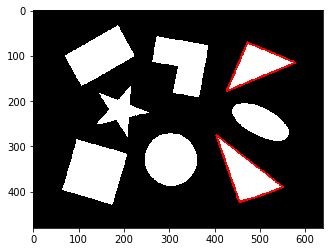

In [45]:
dst=cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    epsilon= cv2.arcLength(cnt, True)*0.02
    approx= cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    print(count) #변곡점 몇개씩 있을까
    if count ==3 :
         cv2.drawContours(dst, [cnt], 0, (0,0,255),3)
imshow("",dst)
#여기서 모든 삼각형은 정확하게 3개의 변곡점으로 이루어져있다.
# 원은 8인데, 8이라고 모두 원은 X 8각형도있고,,

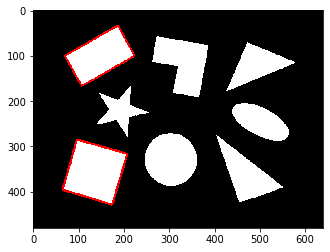

In [43]:
dst=cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    epsilon= cv2.arcLength(cnt, True)*0.02
    approx= cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    if count ==4 : #사각형
         cv2.drawContours(dst, [cnt], 0, (0,0,255),3)
imshow("",dst)

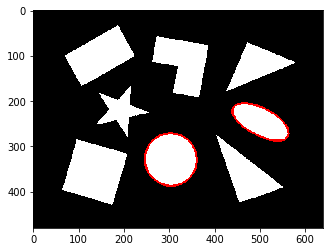

In [46]:
dst=cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    epsilon= cv2.arcLength(cnt, True)*0.02
    approx= cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    if count ==8 : #
         cv2.drawContours(dst, [cnt], 0, (0,0,255),3)
imshow("",dst)

### 책 찾기 예제
## cv2.getStructuringElement + cv2.morphologyEx
- cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)):
- 직사각형모양 5x5크기 커널 매트릭스 생성

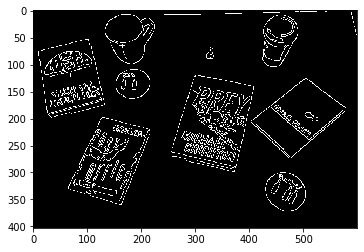

In [5]:
img= cv2.imread("book.jpg")
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray= cv2.GaussianBlur(gray, (3,3), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

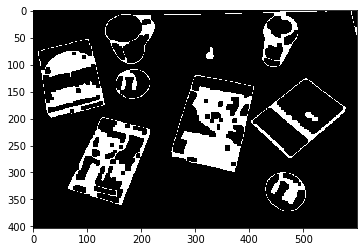

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

In [10]:
contours, _= cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours[0].shape)

(106, 1, 2)


In [11]:
cnt= contours[0]
print(cnt.shape)
epsilon= cv2.arcLength(cnt, True)*0.02 #전체길이의 2퍼센트의 변동이 생기면 합쳐! 그이상 커지면 합치지 말고 점으로 기록하고!
approx= cv2.approxPolyDP(cnt, 90, True) #거리가 10보다 작으면 죽여서 합쳐버려!
print(approx.shape)

(106, 1, 2)
(1, 1, 2)


8 4100.0
4 14438.5
4 13100.0
4 18798.0
8 2701.0
8 183.5
4 12816.5
10 11009.0


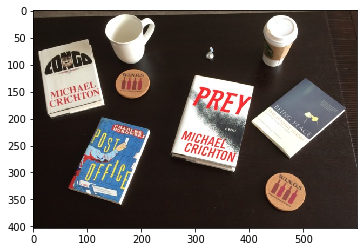

In [15]:
image = cv2.imread("book.jpg")
for cnt in contours:
    peri = cv2.arcLength(cnt, True)    
    area = cv2.contourArea(cnt)    
    
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        
imshow("",img)

    cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    - -1로 주면 안을 모두 채우게됨, 4를 주면 두께조절임
* 컨투어에서의 피팅: 원으로- 반지름과 
    사각형:시작점과 끝점

## 다각형 피팅

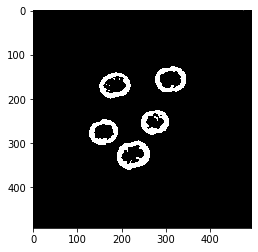

In [24]:
img = cv2.imread("coin.png", 0)

gray_blur = cv2.GaussianBlur(img, (7, 7), 0)

thresh = cv2.adaptiveThreshold(gray_blur, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 45, 6)
imshow("", thresh)
# 배경은0 전경은 255로 나누겠다, 어댑티브 가우시간 자기주변으로부터 가중치 둔다(mean 안둔다), 영상속 동전 어두우니까 inv (취하려는 부분이 255 나오도록) 45 ,6(평균에서 6만큼 떨어진곳까지는 +로봄:배경이 더 많아짐, -라면 배경-object+)

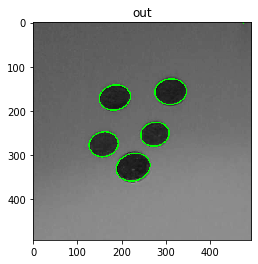

In [25]:
img = cv2.imread("coin.png")
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 2)   
    
imshow("out", img)
#컨투어 영역 찾기
#5: 조그만 점들 제거
#ellipse = cv2.fitEllipse(cnt) : 입력으로 원본아니라 컨투어를줌, 컨투어 가장 잘 설명할수있는 타원 찾음, 타원정보를 ellipse에 return


## 손가락 검출

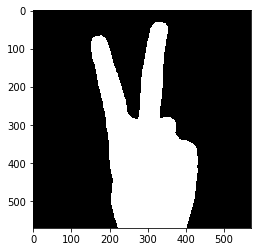

In [81]:
hand_img = cv2.imread("2.jpg")
hsv_img= cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_hand= np.array([0,23,0])
upper_hand= np.array([255,189,255])

mask= cv2.inRange(hsv_img, lower_hand, upper_hand)
mask = cv2.medianBlur(mask, 5)

imshow("",mask)

- segmentation :피부색이라 threshold보다는 특정범위 취해 hsv로

In [82]:
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

c=cnts[0]

print(len(cnts))

1


In [83]:
(cX, cY), r= cv2.minEnclosingCircle(c) #최소원
print(cX, cY, r)

302.5169677734375 308.2913513183594 278.68975830078125


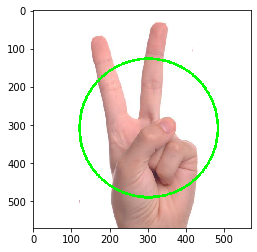

In [84]:
cv2.circle(hand_img, (int(cX), int(cY)), int(r*0.65), (0, 255, 0), 5)
imshow("", hand_img)

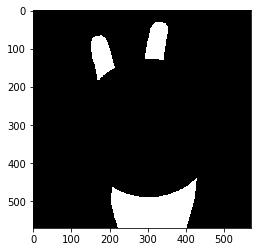

In [85]:
cv2.circle(mask, (int(cX), int(cY)), int(r*0.65), (0, 255, 0), -1)
imshow("", mask)

In [89]:
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("number of finger is:", len(cnts)-1)

number of finger is: 2


In [90]:
#컨투어 확인: 가장큰 숫자 손목
for c in cnts:
    area= cv2.contourArea(c)
    print(area)

18666.0
4598.0
4382.0


### cv2.moments 무게중심

{'m00': 18666.0, 'm10': 5893447.166666666, 'm01': 9715636.166666666, 'm20': 1934494179.5, 'm11': 3062780642.0, 'm02': 5071625049.166666, 'm30': 657141816224.05, 'm21': 1003272607001.3667, 'm12': 1596513640109.4333, 'm03': 2654960506389.35, 'mu20': 73746322.09662747, 'mu11': -4753293.433721542, 'mu02': 14645186.151486397, 'mu30': -207339842.1850586, 'mu21': -628338413.7062683, 'mu12': 189214029.0685959, 'mu03': -61370388.650878906, 'nu20': 0.2116595375508356, 'nu11': -0.013642441567549504, 'nu02': 0.04203319216527099, 'nu30': -0.004355666401176246, 'nu21': -0.013199742453290994, 'nu12': 0.003974890596809083, 'nu03': -0.0012892309411289028}
{'m00': 4598.0, 'm10': 822563.3333333333, 'm01': 551774.6666666666, 'm20': 148056274.3333333, 'm11': 99160598.33333333, 'm02': 69835019.0, 'm30': 26811573082.4, 'm21': 17927861378.833332, 'm12': 12594300837.966667, 'm03': 9253950689.0, 'mu20': 903069.169252336, 'mu11': 450374.526847437, 'mu02': 3620298.953216389, 'mu30': 1802375.8487586975, 'mu21': -5

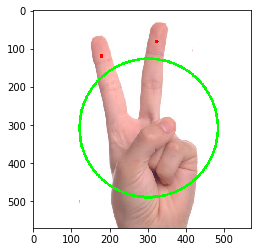

In [91]:
for c in cnts :
    M = cv2.moments(c)
    print(M)
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    if  cY <=  500 :    
        cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), -1) 
imshow("", hand_img)

- m00:면적 그대로(i=0이라 모든 수 0승은1) m02: y값제곱 m20: x값을 제곱함

### cv2.convexHull 매핑
- 컨투어감싸는 볼록다형체 계산: 안으로들어가는것없이 무조건 튀어온형태
### cv2.minAreaRectl 매핑
- 회전된

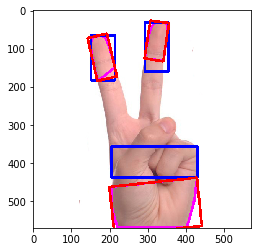

In [92]:
hand_img= cv2.imread("2.jpg")
for c in cnts:
    hull= cv2.convexHull(c)
    cv2.drawContours(hand_img, [hull], 0, (255,0,255),5)
    
    x, y, w, h= cv2.boundingRect(c) 
    cv2.rectangle(hand_img, (x, y), (x+w, w+h), (255,0,0),5)
    
    rect = cv2.minAreaRect(c) 
    box= cv2.boxPoints(rect)
    box= np.int0(box)
    cv2.drawContours(hand_img, [box], 0, (0,0,255),5)
imshow("",hand_img)

- 코드
hand_img= cv2.imread("2.jpg")
for c in cnts:
    hull= cv2.convexHull(c)
    cv2.drawContours(hand_img, [hull], 0, (255,0,255),5)
    
    x, y, w, h= cv2.boundingRect(c) #특정위치 표시
    cv2.rectangle(hand_img, (x, y), (x+w, w+h), (255,0,0),5)
    
    rect = cv2.minAreaRect(c) #얼마나 회전되었는지
    box= cv2.boxPoints(rect)
    box= np.int0(box)
    cv2.drawContours(hand_img, [box], 0, (0,0,255),5)
imshow("",hand_img)

#int0 한꺼번에 바꿔주는거